In [23]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images = np.expand_dims(train_images,-1)

In [7]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
test_images = np.expand_dims(test_images,-1)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,#filter个数,拟合度不够要增加，减少信息丢失
                                 (3,3),#卷积核
                                 input_shape=(28,28,1),
                                 activation='relu',
                                padding='same'))


In [12]:
model.output_shape#padding=same的时候是28，28，32，如果是默认的valid，就是26，26，32,填充和不填充的区别

(None, 28, 28, 32)

In [13]:
model.add(tf.keras.layers.MaxPool2D())#默认池化大小2*2
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
#为了添加拟合度，可以增加池化层数和Conv层数与filter数量
#过拟合的话加dropout

In [14]:
model.output_shape

(None, 64)

In [15]:
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
Total params: 19,466
Trainable params: 19,466
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [18]:
history = model.fit(train_images,train_labels,epochs=30,validation_data=(test_images,test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 315us/sample - loss: 0.8139 - acc: 0.7406 - val_loss: 0.5549 - val_acc: 0.8115
Epoch 2/30
60000/60000 [==============================] - 18s 306us/sample - loss: 0.4804 - acc: 0.8317 - val_loss: 0.4628 - val_acc: 0.8362
Epoch 3/30
60000/60000 [==============================] - 18s 302us/sample - loss: 0.4206 - acc: 0.8527 - val_loss: 0.4084 - val_acc: 0.8566
Epoch 4/30
60000/60000 [==============================] - 18s 303us/sample - loss: 0.3869 - acc: 0.8652 - val_loss: 0.4254 - val_acc: 0.8527
Epoch 5/30
60000/60000 [==============================] - 18s 307us/sample - loss: 0.3628 - acc: 0.8721 - val_loss: 0.3696 - val_acc: 0.8719
Epoch 6/30
60000/60000 [==============================] - 18s 307us/sample - loss: 0.3419 - acc: 0.8795 - val_loss: 0.3653 - val_acc: 0.8751
Epoch 7/30
60000/60000 [==============================] - 18s 306us/sample - loss: 0.3266 - acc: 0.8845 

In [21]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

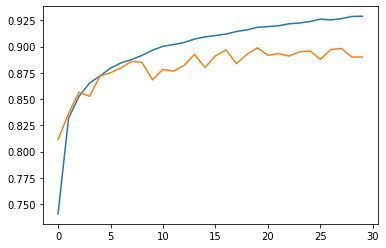

In [24]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

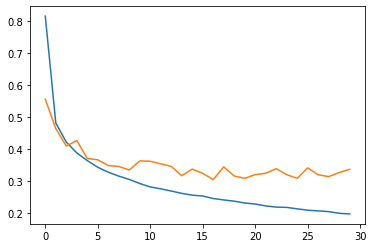

In [25]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')